In [167]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams 
rcParams['pdf.fonttype'] = 42 # True font
rcParams['font.size'] =  8  
rcParams['grid.linewidth'] =  0.5 
rcParams['lines.color'] = 'b' 
rcParams['lines.linewidth'] = 1 
rcParams['lines.markersize'] = 3
rcParams['lines.markeredgewidth'] = 0 # set Marker with no edgelinesMerge_insulation_df.loc[P, :]
rcParams['axes.linewidth'] = 0.5
rcParams['axes.titlesize'] = 8
rcParams['axes.labelsize'] = 8
rcParams['xtick.labelsize'] = 8
rcParams['ytick.labelsize'] = 8
rcParams['legend.fontsize'] = 8
rcParams['legend.title_fontsize'] = 8

In [168]:
# This ASE genes are from Nature method, 2020. 10.1038/s41592-019-0617-2
filename = "/data3/HG001-pore-c/hg001-dip3d-output/contact_hap-pore-c/ref/PMC7768885_SuppTable11_ASE.csv"
ASEgenes = pd.read_table(filename, sep=",")
ASEgenes.head(5)

,Gene_ID,reads,Maternal,Paternal,Diff,Chr,ASE,Gene_symbol,chr_type
0,ENSG00000106638,135,0.400000,0.548148,0.148148,chr7,Unassigned,TBL2,Autosome
1,ENSG00000145901,2252,0.427176,0.479574,0.052398,chr5,Paternal,TNIP1,Autosome
2,ENSG00000166501,441,0.532880,0.442177,-0.090703,chr16,Unassigned,PRKCB,Autosome
3,ENSG00000136068,55,0.418182,0.454545,0.036364,chr3,Unassigned,FLNB,Autosome
4,ENSG00000105193,15121,0.402222,0.573639,0.171417,chr19,Paternal,RPS16,Autosome


In [263]:
ASEgenes

,Gene_ID,reads,Maternal,Paternal,Diff,Chr,ASE,Gene_symbol,chr_type,chrom,start,end,strand,tss_start,tss_end
0,ENSG00000001036,251,0.486056,0.494024,0.007968,chr6,Unassigned,FUCA2,Autosome,chr6,143815948,143832827,-,143831827,143833827
1,ENSG00000001561,117,0.418803,0.555556,0.136752,chr6,Unassigned,ENPP4,Autosome,chr6,46097730,46114436,+,46096730,46098730
2,ENSG00000001629,90,0.433333,0.555556,0.122222,chr7,Unassigned,ANKIB1,Autosome,chr7,91875548,92030698,+,91874548,91876548
3,ENSG00000001630,292,0.462329,0.445205,-0.017123,chr7,Unassigned,CYP51A1,Autosome,chr7,91741465,91764117,-,91763117,91765117
4,ENSG00000002016,15,0.200000,0.666667,0.466667,chr12,Unassigned,RAD52,Autosome,chr12,1021243,1099219,-,1098219,1100219
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3587,ENSG00000279602,7,0.285714,0.571429,0.285714,chr17,Unassigned,AC109326.1,Autosome,chr17,41437409,41438729,-,41437729,41439729
3588,ENSG00000280123,37,0.432432,0.459459,0.027027,chr8,Unassigned,AC023632.6,Autosome,chr8,95439940,95442116,-,95441116,95443116
3589,ENSG00000280355,34,0.558824,0.382353,-0.176471,chr10,Unassigned,AL132656.4,Autosome,chr10,81441729,81443850,-,81442850,81444850
3590,ENSG00000280739,6,0.333333,0.500000,0.166667,chr3,Unassigned,EIF1B-AS1,Autosome,chr3,40214636,40351189,-,40350189,40352189


In [169]:
# Loading Genecode V29 hg19 reference database
ref_hg19_genes = pd.read_csv("/data3/HG001-pore-c/hg001-dip3d-output/contact_hap-pore-c/ref/gencode.v29lift37.annotation.gtf.gz",
                         header=None,sep="\t", skiprows=5)
ref_hg19_genes= ref_hg19_genes.loc[ref_hg19_genes[2]=='gene']
ref_hg19_genes['geneid'] = ref_hg19_genes[8].str.split('"', expand=True)[1]
ref_hg19_genes["GeneID"] = ref_hg19_genes['geneid'].str.split(".", expand=True)[0]
ref_hg19_genes = ref_hg19_genes.set_index("GeneID")
ref_hg19_genes_subset = ref_hg19_genes[[0, 3, 4, 6]].rename(columns={0: "chrom", 3: "start", 4: "end", 6: "strand"})
ref_hg19_genes_subset.head()

# 合并 DataFrame，将 ref_hg19_genes_subset 的信息合并到 ASEgenes 中
ASEgenes = ASEgenes.set_index("Gene_ID")
ASEgenes = ASEgenes.merge(ref_hg19_genes_subset, left_index=True, right_index=True, how="left")
# Gene_ID 重新将其重置为列
ASEgenes = ASEgenes.reset_index()
ASEgenes = ASEgenes.dropna(subset=["chrom", "start", "end"])
ASEgenes = ASEgenes.astype({"start": int, "end": int})
ASEgenes.head()

,Gene_ID,reads,Maternal,Paternal,Diff,Chr,ASE,Gene_symbol,chr_type,chrom,start,end,strand
0,ENSG00000001036,251,0.486056,0.494024,0.007968,chr6,Unassigned,FUCA2,Autosome,chr6,143815948,143832827,-
1,ENSG00000001561,117,0.418803,0.555556,0.136752,chr6,Unassigned,ENPP4,Autosome,chr6,46097730,46114436,+
2,ENSG00000001629,90,0.433333,0.555556,0.122222,chr7,Unassigned,ANKIB1,Autosome,chr7,91875548,92030698,+
3,ENSG00000001630,292,0.462329,0.445205,-0.017123,chr7,Unassigned,CYP51A1,Autosome,chr7,91741465,91764117,-
4,ENSG00000002016,15,0.200000,0.666667,0.466667,chr12,Unassigned,RAD52,Autosome,chr12,1021243,1099219,-


In [188]:
tss_region_size = 1000
ASEgenes['tss_start'] = ASEgenes.apply(lambda row: row["start"] - tss_region_size if row["strand"] == '+' 
                            else row["end"] - tss_region_size, axis=1)
ASEgenes['tss_end'] = ASEgenes.apply(lambda row: row["start"] + tss_region_size if row["strand"] == '+' 
                           else row["end"] + tss_region_size, axis=1)
ASEgenes.head()

,Gene_ID,reads,Maternal,Paternal,Diff,Chr,ASE,Gene_symbol,chr_type,chrom,start,end,strand,tss_start,tss_end
0,ENSG00000001036,251,0.486056,0.494024,0.007968,chr6,Unassigned,FUCA2,Autosome,chr6,143815948,143832827,-,143831827,143833827
1,ENSG00000001561,117,0.418803,0.555556,0.136752,chr6,Unassigned,ENPP4,Autosome,chr6,46097730,46114436,+,46096730,46098730
2,ENSG00000001629,90,0.433333,0.555556,0.122222,chr7,Unassigned,ANKIB1,Autosome,chr7,91875548,92030698,+,91874548,91876548
3,ENSG00000001630,292,0.462329,0.445205,-0.017123,chr7,Unassigned,CYP51A1,Autosome,chr7,91741465,91764117,-,91763117,91765117
4,ENSG00000002016,15,0.200000,0.666667,0.466667,chr12,Unassigned,RAD52,Autosome,chr12,1021243,1099219,-,1098219,1100219


In [109]:
# Export ASEgenes
# filename = "/data3/HG001-pore-c/hg001-dip3d-output/contact_hap-pore-c/ref/PMC7768885_SuppTable11_ASE_position.csv"
# ASEgenes.to_csv(filename, header=True, index=False)

# Inport
filename = "/data3/HG001-pore-c/hg001-dip3d-output/contact_hap-pore-c/ref/PMC7768885_SuppTable11_ASE_position.csv"
ASEgenes = pd.read_csv(filename, header=0, index_col=None)

In [8]:
filename = "/data3/HG001-pore-c/hg001-dip3d-output/contact_hap-pore-c/ref/Allele_specific_genes_v1.txt"
ASEgenes_v0 = pd.read_table(filename, sep="\t")
ASEgenes_v0.head(5)

,Chromosome,Gene ID,Gene name,Expressed allele
0,chr1,ENSG00000078900,TP73,Maternal
1,chr1,ENSG00000049246,PER3,Paternal
2,chr1,ENSG00000236266,RP3-467L1.4,Paternal
3,chr1,ENSG00000183682,BMP8A,Paternal
4,chr1,ENSG00000243970,PPIEL,Paternal


In [5]:
# Overlap with V0 ASE genes
P = ASEgenes_v0["Gene ID"].isin(ASEgenes["Gene_ID"])
print( "All overlaps:", sum(P) )
chrXP = ASEgenes_v0["Chromosome"] == "chrX"
P = ASEgenes_v0.loc[chrXP, "Gene ID"].isin(ASEgenes["Gene_ID"])
sum(P)
print( "chrX overlaps:", sum(P) )

All overlaps: 58
chrX overlaps: 30


In [110]:
# The previous mgenes and pgenes
mgene = pd.read_table("/data3/HG001-pore-c/hg001-dip3d-output/contact_hap-pore-c/ref/maternal_gene.txt")
pgene = pd.read_table("/data3/HG001-pore-c/hg001-dip3d-output/contact_hap-pore-c/ref/paternal_gene.txt")

ASEgenes_filt = ASEgenes.loc[ASEgenes["ASE"]!= "Unassigned", :]
P = mgene["index"].isin( ASEgenes_filt["Gene_ID"].tolist() )
print( f"mgenes N={len(P)} overlaps: {sum(P) }" )
P = pgene["index"].isin( ASEgenes_filt["Gene_ID"].tolist() )
print( f"pgenes N={len(P)} overlaps: {sum(P) }" )

mgenes N=58 overlaps: 1
pgenes N=94 overlaps: 4


In [111]:
# Compartment Comparison
## export to compartment bed
pP = (ASEgenes["ASE"] == "Paternal") & (ASEgenes["chrom"] != "chrX")
ASEgenes.loc[pP, ["chrom", "tss_start", "tss_end"] ].to_csv("/data3/HG001-pore-c/hg001-dip3d-output/contact_hap-pore-c/ref/NM_ASE/pgene_hg19.bed",
                                                                    index=None, header=None, sep="\t")

mP = (ASEgenes["ASE"] == "Maternal") & (ASEgenes["chrom"] != "chrX")
ASEgenes.loc[mP, ["chrom", "tss_start", "tss_end"] ].to_csv("/data3/HG001-pore-c/hg001-dip3d-output/contact_hap-pore-c/ref/NM_ASE/mgene_hg19.bed",
                                                                    index=None, header=None, sep="\t")

In [175]:
%%bash
## compartment overlap
cd /data3/HG001-pore-c/hg001-dip3d-output/contact_hap-pore-c/ref/NM_ASE
bedtools intersect -a compartment_score.bed -b pgene_hg19.bed -wao > pgene_hg19_compartment.txt
bedtools intersect -a compartment_score.bed -b mgene_hg19.bed -wao > mgene_hg19_compartment.txt

In [176]:
hg19pgene_compart = pd.read_table("/data3/HG001-pore-c/hg001-dip3d-output/contact_hap-pore-c/ref/NM_ASE/pgene_hg19_compartment.txt",
                          header=None)
hg19mgene_compart = pd.read_table("/data3/HG001-pore-c/hg001-dip3d-output/contact_hap-pore-c/ref/NM_ASE/mgene_hg19_compartment.txt",
                          header=None)
tmp1 = hg19pgene_compart.loc[hg19pgene_compart[3]!="."].copy()
tmp2 = hg19mgene_compart.loc[hg19mgene_compart[3]!="."].copy()
tmp1 = tmp1.sort_values(6, ascending=False).drop_duplicates([3,4,5])
tmp2 = tmp2.sort_values(6, ascending=False).drop_duplicates([3,4,5])
tmp1

,0,1,2,3,4,5,6
32,chr1,1600000,1650000,chr1,1623167,1625167,2000
48024,chr15,93400000,93450000,chr15,93442419,93444419,2000
45316,chr14,65350000,65400000,chr14,65380079,65382079,2000
45394,chr14,69250000,69300000,chr14,69261970,69263970,2000
45500,chr14,74550000,74600000,chr14,74550499,74552499,2000
...,...,...,...,...,...,...,...
56530,chr21,44250000,44300000,chr21,44298678,44300678,1322
47354,chr15,59900000,59950000,chr15,59948740,59950740,1260
55038,chr20,32700000,32750000,chr20,32699138,32701138,1138
13896,chr4,4200000,4250000,chr4,4248939,4250939,1061


In [177]:
### loading comparmtnet
infile="/data3/HG001-pore-c/hg001-dip3d-output/contact_hap-pore-c/ipynb/hg001_paternal_compartment_eginvector_scores.csv"
peigenvector_track = pd.read_csv(infile, header=0, index_col=None)

infile="/data3/HG001-pore-c/hg001-dip3d-output/contact_hap-pore-c/ipynb/hg001_maternal_compartment_eginvector_scores.csv"
meigenvector_track = pd.read_csv(infile, header=0, index_col=None)

In [179]:
# Insulation scores
resolution = 10000
windows = [3*resolution, 5*resolution, 10*resolution, 25*resolution]
# input
infile = "/data3/HG001-pore-c/hg001-dip3d-output/contact_hap-pore-c/ipynb/hg001_paternal_insulation_scores.csv"
pinsulation_table = pd.read_csv(infile, header=0, index_col=None)

# export
infile = "/data3/HG001-pore-c/hg001-dip3d-output/contact_hap-pore-c/ipynb/hg001_maternal_insulation_scores.csv"
minsulation_table = pd.read_csv(infile, header=0, index_col=None)

pfirst_window_summary = pinsulation_table.columns[[ str(windows[-1]) in i for i in pinsulation_table.columns]]
pinsulation_df = pinsulation_table[['chrom','start','end','region','is_bad_bin']+list(pfirst_window_summary)]
mfirst_window_summary = minsulation_table.columns[[ str(windows[-1]) in i for i in minsulation_table.columns]]
minsulation_df = minsulation_table[['chrom','start','end','region','is_bad_bin']+list(mfirst_window_summary)]

pinsulation_df

,chrom,start,end,region,is_bad_bin,log2_insulation_score_250000,n_valid_pixels_250000,boundary_strength_250000,is_boundary_250000
0,chr1,0,25000,chr1,True,NaN,0.0,NaN,False
1,chr1,25000,50000,chr1,True,NaN,0.0,NaN,False
2,chr1,50000,75000,chr1,True,NaN,0.0,NaN,False
3,chr1,75000,100000,chr1,True,NaN,0.0,NaN,False
4,chr1,100000,125000,chr1,True,NaN,0.0,NaN,False
...,...,...,...,...,...,...,...,...,...
115249,chr22,51200000,51225000,chr22,False,1.317793,8.0,NaN,False
115250,chr22,51225000,51250000,chr22,True,NaN,0.0,NaN,False
115251,chr22,51250000,51275000,chr22,True,NaN,0.0,NaN,False
115252,chr22,51275000,51300000,chr22,True,NaN,0.0,NaN,False


In [180]:
%%bash
## compartment overlap
cd /data3/HG001-pore-c/hg001-dip3d-output/contact_hap-pore-c/ref/NM_ASE
bedtools intersect -a insulation.bed -b pgene_hg19.bed -wao > pgene_hg19_insulation.txt
bedtools intersect -a insulation.bed -b mgene_hg19.bed -wao > mgene_hg19_insulation.txt

In [181]:
P_insulation = pinsulation_df[['chrom', 'start', 'end', 'log2_insulation_score_250000', 'is_boundary_250000']].copy()
M_insulation = minsulation_df[['chrom', 'start', 'end', 'log2_insulation_score_250000', 'is_boundary_250000']].copy()

hg19pgene_insulation = pd.read_table("/data3/HG001-pore-c/hg001-dip3d-output/contact_hap-pore-c/ref/NM_ASE/pgene_hg19_insulation.txt",
                          header=None)
hg19mgene_insulation = pd.read_table("/data3/HG001-pore-c/hg001-dip3d-output/contact_hap-pore-c/ref/NM_ASE/mgene_hg19_insulation.txt",
                          header=None)

tmp1 = hg19pgene_insulation.loc[hg19pgene_insulation[3]!="."].copy()
tmp2 = hg19mgene_insulation.loc[hg19mgene_insulation[3]!="."].copy()

tmp1 = tmp1.sort_values(6, ascending=False).drop_duplicates([3,4,5])
tmp2 = tmp2.sort_values(6, ascending=False).drop_duplicates([3,4,5])

P_plot = pd.merge(tmp1, P_insulation,
                  left_on=[0,1,2], right_on=['chrom', 'start', 'end'])
P_plot = pd.merge(P_plot, M_insulation,
                  left_on=[0,1,2], right_on=['chrom', 'start', 'end'])

P_plot[['log2_insulation_score_250000_x', 'log2_insulation_score_250000_y']].corr() 

M_plot = pd.merge(tmp2, P_insulation,
                  left_on=[0,1,2], right_on=['chrom', 'start', 'end'])
M_plot = pd.merge(M_plot, M_insulation,
                  left_on=[0,1,2], right_on=['chrom', 'start', 'end'])

In [183]:
# Parental specific compartment
'''
1. Compartment switch
2. compartment score diff larger than 0.99
3. not NaN compartment regions
'''
haplotype_envector_track = peigenvector_track.copy()
haplotype_envector_track.columns = ["chrom", "start", "end", "paternal"]
haplotype_envector_track["maternal"] = meigenvector_track["E1"].values

# auto chromosomes
P = haplotype_envector_track["chrom"].isin( [f"chr{N}" for N in range(1,22+1)] )
haplotype_envector_track = haplotype_envector_track.loc[P,:].reset_index(drop=True)

# A B compartment switch
haplotype_envector_track['switch'] = np.where(
    (haplotype_envector_track['paternal'] > 0) & (haplotype_envector_track['maternal'] < 0), 
    'A-B', 
    np.where(
        (haplotype_envector_track['paternal'] < 0) & (haplotype_envector_track['maternal'] > 0), 
        'B-A', 
        'None'
    )
)
## fill NA 0
P = ( haplotype_envector_track["paternal"].isna() ) | ( haplotype_envector_track["maternal"].isna() ) 
haplotype_envector_track["isna"] = 0
haplotype_envector_track.loc[P, "isna"] = 1
#haplotype_envector_track = haplotype_envector_track.fillna(0)
haplotype_envector_track 

,chrom,start,end,paternal,maternal,switch,isna
0,chr1,0,50000,NaN,NaN,None,1
1,chr1,50000,100000,NaN,NaN,None,1
2,chr1,100000,150000,NaN,NaN,None,1
3,chr1,150000,200000,NaN,NaN,None,1
4,chr1,200000,250000,NaN,NaN,None,1
...,...,...,...,...,...,...,...
57628,chr22,51100000,51150000,-0.117415,-0.056136,None,0
57629,chr22,51150000,51200000,-0.216355,-0.040070,None,0
57630,chr22,51200000,51250000,NaN,-0.084920,None,1
57631,chr22,51250000,51300000,NaN,NaN,None,1


In [184]:
# 计算 paternal 和 maternal 列之间的差值绝对值，并存储在新列 'abs_diff' 中
haplotype_envector_track['abs_diff'] = (haplotype_envector_track['paternal'] - haplotype_envector_track['maternal']).abs()
# 计算差值绝对值的 95%, 99% 分位数（忽略 NaN 值）
threshold = haplotype_envector_track['abs_diff'].dropna().quantile(0.99)
# threshold95 = haplotype_envector_track['abs_diff'].dropna().quantile(0.95)
# 创建新的 top_0.99 列，绝对差值大于或等于 99% 分位数的赋值为 1，否则为 0
haplotype_envector_track['top_0.99'] = np.where(haplotype_envector_track['abs_diff'] >= threshold, 1, 0)
# haplotype_envector_track['top_0.95'] = np.where(haplotype_envector_track['abs_diff'] >= threshold, 1, 0)

In [185]:
# Export 
P = ( haplotype_envector_track["switch"] != 'None' )  & ( haplotype_envector_track["top_0.99"] == 1  )
Compart_diff_regions = haplotype_envector_track.loc[P, :].reset_index(drop=True)
exfile = "/data3/HG001-pore-c/hg001-dip3d-output/contact_hap-pore-c/ipynb/hg001_paternal_compartment_diff_regions.csv"
# Compart_diff_regions.to_csv(exfile, header=True, index=False)
Compart_diff_regions

,chrom,start,end,paternal,maternal,switch,isna,abs_diff,top_0.99
0,chr1,62500000,62550000,0.124078,-0.247846,A-B,0,0.371924,1
1,chr1,236950000,237000000,-0.271715,0.139820,B-A,0,0.411534,1
2,chr1,243300000,243350000,-0.073851,0.309254,B-A,0,0.383105,1
3,chr1,247350000,247400000,0.166005,-0.210859,A-B,0,0.376865,1
4,chr2,13500000,13550000,0.079049,-0.476203,A-B,0,0.555251,1
...,...,...,...,...,...,...,...,...,...
156,chr22,50250000,50300000,-0.505067,0.221877,B-A,0,0.726943,1
157,chr22,50300000,50350000,-0.121594,0.342658,B-A,0,0.464252,1
158,chr22,50450000,50500000,-0.393863,0.304257,B-A,0,0.698120,1
159,chr22,50500000,50550000,-0.311789,0.105216,B-A,0,0.417005,1


In [186]:
ASEgenes

,Gene_ID,reads,Maternal,Paternal,Diff,Chr,ASE,Gene_symbol,chr_type,chrom,start,end,strand
0,ENSG00000001036,251,0.486056,0.494024,0.007968,chr6,Unassigned,FUCA2,Autosome,chr6,143815948,143832827,-
1,ENSG00000001561,117,0.418803,0.555556,0.136752,chr6,Unassigned,ENPP4,Autosome,chr6,46097730,46114436,+
2,ENSG00000001629,90,0.433333,0.555556,0.122222,chr7,Unassigned,ANKIB1,Autosome,chr7,91875548,92030698,+
3,ENSG00000001630,292,0.462329,0.445205,-0.017123,chr7,Unassigned,CYP51A1,Autosome,chr7,91741465,91764117,-
4,ENSG00000002016,15,0.200000,0.666667,0.466667,chr12,Unassigned,RAD52,Autosome,chr12,1021243,1099219,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3587,ENSG00000279602,7,0.285714,0.571429,0.285714,chr17,Unassigned,AC109326.1,Autosome,chr17,41437409,41438729,-
3588,ENSG00000280123,37,0.432432,0.459459,0.027027,chr8,Unassigned,AC023632.6,Autosome,chr8,95439940,95442116,-
3589,ENSG00000280355,34,0.558824,0.382353,-0.176471,chr10,Unassigned,AL132656.4,Autosome,chr10,81441729,81443850,-
3590,ENSG00000280739,6,0.333333,0.500000,0.166667,chr3,Unassigned,EIF1B-AS1,Autosome,chr3,40214636,40351189,-


In [189]:
# 区域是否富集 ASE基因
import io
## Overlap 分析
# 假设 ASEgenes_filt 和 Compart_diff_regions 已经加载为 pandas DataFrame
# 1. 将 DataFrame 导出为 BED 文件格式
ASEgenes_bed = ASEgenes[['chrom', 'tss_start', 'tss_end', 'Gene_ID']]
Compartment_regions_bed = haplotype_envector_track[['chrom', 'start', 'end', 'switch']]

# 保存为临时 BED 文件
ASEgenes_bed.to_csv('ASEgenes.bed', sep='\t', header=False, index=False)
Compartment_regions_bed.to_csv('Compartment_diff_regions.bed', sep='\t', header=False, index=False)

# 2. 使用 bedtools intersect 查找重叠的区域
intersect_command = "bedtools intersect -a Compartment_diff_regions.bed -b ASEgenes.bed -wa -wb"
result = subprocess.run(intersect_command, shell=True, capture_output=True, text=True)

# 3. 将结果加载回 pandas DataFrame
intersected_data = pd.read_csv(io.StringIO(result.stdout), sep='\t', header=None)
# 设置列名，前4列来自 ASEgenes_filt，后4列来自 Compart_diff_regions
intersected_data.columns = [ 'chrom', 'start', 'end', 'switch', 'chr', 'tss_start', 'tss_end', 'Gene_ID']


In [190]:
intersected_data

,chrom,start,end,switch,chr,tss_start,tss_end,Gene_ID
0,chr1,850000,900000,NaN,chr1,893689,895689,ENSG00000188976
1,chr1,950000,1000000,NaN,chr1,954503,956503,ENSG00000188157
2,chr1,1050000,1100000,NaN,chr1,1050741,1052741,ENSG00000131591
3,chr1,1550000,1600000,NaN,chr1,1589473,1591473,ENSG00000248333
4,chr1,1600000,1650000,NaN,chr1,1623167,1625167,ENSG00000189339
...,...,...,...,...,...,...,...,...
3667,chr22,50950000,51000000,NaN,chr22,50963035,50965035,ENSG00000130489
3668,chr22,51000000,51050000,NaN,chr22,51015894,51017894,ENSG00000205560
3669,chr22,51000000,51050000,NaN,chr22,51020394,51022394,ENSG00000254413
3670,chr22,51000000,51050000,NaN,chr22,51038884,51040884,ENSG00000100288


In [191]:
# 1. 合并两个 DataFrame
merged_df = pd.merge(
    haplotype_envector_track,
    intersected_data[['chrom', 'tss_start', 'tss_end', 'Gene_ID', 'start', 'end']],
    how='left',
    left_on=['chrom', 'start', 'end'],
    right_on=['chrom', 'start', 'end']
)

P = (merged_df["switch"] == "None")&(~ merged_df["paternal"].isna() ) & (~ merged_df["maternal"].isna() )
merged_df.loc[P, "switch"] = "same"

# 1. 选择 ASEgenes_filt 中的感兴趣的列
ase_info_columns = ['Gene_ID', 'Maternal', 'Paternal', 'Diff', 'Chr', 'ASE', 'Gene_symbol']
# 2. 根据 Gene_ID 进行合并
final_df = pd.merge(
    merged_df,
    ASEgenes[ase_info_columns],
    how='left',
    on='Gene_ID'
)

exfile = "/data3/HG001-pore-c/hg001-dip3d-output/contact_hap-pore-c/ipynb/hg001_paternal_compartment_diff_regions.csv"
final_df.to_csv(exfile, header=True, index=False)

In [192]:
# Compartment scores
infile = "/data3/HG001-pore-c/hg001-dip3d-output/contact_hap-pore-c/ipynb/hg001_paternal_compartment_diff_regions.csv"
compartment_diff_df = pd.read_csv(infile, header=0, index_col=None, sep=",")
compartment_diff_df["comp_diff"] = compartment_diff_df["paternal"] - compartment_diff_df["maternal"]
compartment_diff_df

,chrom,start,end,paternal,maternal,switch,isna,abs_diff,top_0.99,tss_start,tss_end,Gene_ID,Maternal,Paternal,Diff,Chr,ASE,Gene_symbol,comp_diff
0,chr1,0,50000,NaN,NaN,NaN,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,chr1,50000,100000,NaN,NaN,NaN,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chr1,100000,150000,NaN,NaN,NaN,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,chr1,150000,200000,NaN,NaN,NaN,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,chr1,200000,250000,NaN,NaN,NaN,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58144,chr22,51100000,51150000,-0.117415,-0.056136,same,0,0.061279,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.061279
58145,chr22,51150000,51200000,-0.216355,-0.040070,same,0,0.176284,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.176284
58146,chr22,51200000,51250000,NaN,-0.084920,NaN,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
58147,chr22,51250000,51300000,NaN,NaN,NaN,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [193]:
# Tracks export
track_dir = "/data3/HG001-pore-c/hg001-dip3d-output/contact_hap-pore-c/ipynb/Tracks_file"

exfile = f"{track_dir}/hg001_paternal_compartment.bedgraph"
compartment_diff_df.loc[:, ["chrom", "start", "end", "paternal"] ].to_csv(exfile, header=False, index=False, sep="\t")

exfile = f"{track_dir}/hg001_maternal_compartment.bedgraph"
compartment_diff_df.loc[:, ["chrom", "start", "end", "maternal"] ].to_csv(exfile, header=False, index=False, sep="\t")

exfile = f"{track_dir}/hg001_compartment_diff.bedgraph"
compartment_diff_df.loc[:, ["chrom", "start", "end", "comp_diff"] ].to_csv(exfile, header=False, index=False, sep="\t")

exfile = f"{track_dir}/hg001_compartment_Paternal_genes.bedgraph"
compartment_diff_df.loc[:, ["chrom", "start", "end", "Paternal"] ].to_csv(exfile, header=False, index=False, sep="\t")

exfile = f"{track_dir}/hg001_compartment_Maternal_genes.bedgraph"
compartment_diff_df.loc[:, ["chrom", "start", "end", "Maternal"] ].to_csv(exfile, header=False, index=False, sep="\t")

exfile = f"{track_dir}/hg001_compartment_genes_diff.bedgraph"
compartment_diff_df.loc[:, ["chrom", "start", "end", "Diff"] ].to_csv(exfile, header=False, index=False, sep="\t")

P =  compartment_diff_df["switch"] == "A-B"
exfile = f"{track_dir}/hg001_compartment_switch_A2B.bed"
compartment_diff_df.loc[P, ["chrom", "start", "end", "switch"] ].to_csv(exfile, header=False, index=False, sep="\t")

P =  compartment_diff_df["switch"] == "B-A"
exfile = f"{track_dir}/hg001_compartment_switch_B2A.bed"
compartment_diff_df.loc[P, ["chrom", "start", "end", "switch"] ].to_csv(exfile, header=False, index=False, sep="\t")

In [194]:
compartment_diff_df["switch"].value_counts()

switch
same    49807
B-A      1098
A-B       995
Name: count, dtype: int64

In [209]:
compartment_diff_df["switch"].value_counts()

switch
same    49807
B-A      1098
A-B       995
Name: count, dtype: int64

In [196]:
# 富集程度计算
ASEgenes_p = sum( compartment_diff_df["ASE"].isin(["Paternal", "Maternal"]) ) / len(compartment_diff_df)
print(f"Background : {ASEgenes_p} per 50kb ")

P =  (  compartment_diff_df["ASE"].isin(["Paternal", "Maternal"]) ) & ( compartment_diff_df["switch"]!="None"  ) & ( compartment_diff_df["top_0.99"] == 1  )
ASEgenes_match_p  = sum(P) / sum(  ( compartment_diff_df["switch"]!="None"  ) & ( compartment_diff_df["top_0.99"] == 1  )  )
print(f"ASE genes in Compartment differnece regions : {ASEgenes_match_p } per 50kb ")

Background : 0.008134275739909543 per 50kb 
ASE genes in Compartment differnece regions : 0.011538461538461539 per 50kb 


In [197]:
P = (~compartment_diff_df["switch"].isna()) & (compartment_diff_df["top_0.99"]==1) & (compartment_diff_df["isna"]==0) & ( ~ compartment_diff_df["ASE"].isna() )
filt_data = compartment_diff_df.loc[P,:] 
filt_data

,chrom,start,end,paternal,maternal,switch,isna,abs_diff,top_0.99,tss_start,tss_end,Gene_ID,Maternal,Paternal,Diff,Chr,ASE,Gene_symbol,comp_diff
5658,chr2,31450000,31500000,0.224144,0.616566,same,0,0.392422,1,31456203.0,31458203.0,ENSG00000013016,1.000000,0.000000,-1.000000,chr2,Maternal,EHD3,-0.392422
7243,chr2,110350000,110400000,1.063891,0.588179,same,0,0.475711,1,110370783.0,110372783.0,ENSG00000186522,0.214286,0.464286,0.250000,chr2,Unassigned,SEPT10,0.475711
14028,chr4,5700000,5750000,0.003681,0.425253,same,0,0.421571,1,5711924.0,5713924.0,ENSG00000072840,1.000000,0.000000,-1.000000,chr4,Unassigned,EVC,-0.421571
14264,chr4,17500000,17550000,0.190510,0.702271,same,0,0.511761,1,17512857.0,17514857.0,ENSG00000151552,0.342105,0.605263,0.263158,chr4,Unassigned,QDPR,-0.511761
15289,chr4,68550000,68600000,0.962128,0.573767,same,0,0.388361,1,68565897.0,68567897.0,ENSG00000033178,0.673333,0.280000,-0.393333,chr4,Maternal,UBA6,0.388361
15290,chr4,68550000,68600000,0.962128,0.573767,same,0,0.388361,1,68565998.0,68567998.0,ENSG00000248049,0.458333,0.479167,0.020833,chr4,Unassigned,UBA6-AS1,0.388361
17670,chr4,187100000,187150000,0.418050,-0.024705,A-B,0,0.442755,1,187111674.0,187113674.0,ENSG00000145476,0.642857,0.357143,-0.285714,chr4,Unassigned,CYP4V2,0.442755
17758,chr5,300000,350000,2.042330,1.435250,same,0,0.607079,1,303291.0,305291.0,ENSG00000063438,0.453552,0.497268,0.043716,chr5,Unassigned,AHRR,0.607079
24013,chr6,130650000,130700000,-0.145485,0.268761,B-A,0,0.414245,1,130685879.0,130687879.0,ENSG00000164484,0.000000,1.000000,1.000000,chr6,Paternal,TMEM200A,-0.414245
26723,chr7,94250000,94300000,0.074058,-0.313061,A-B,0,0.387118,1,94284637.0,94286637.0,ENSG00000242265,0.000000,0.935897,0.935897,chr7,Paternal,PEG10,0.387118


In [198]:
compartment_diff_df["switch"]

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
         ... 
58144    same
58145    same
58146     NaN
58147     NaN
58148     NaN
Name: switch, Length: 58149, dtype: object

Pearsons r = -0.02
 P = 1.471e-01


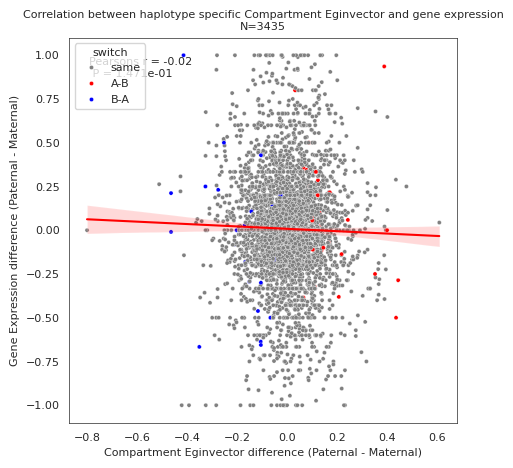

In [270]:
# Compartment scores and haplotype specific expression
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# 确保 diff_compartment 和 Diff 列中没有 NaN 值
filtered_df =   compartment_diff_df.drop_duplicates(subset=["Gene_ID"], keep="first")
filtered_df = filtered_df.dropna(subset=['comp_diff', 'Diff'])

# haplotype specific boundary 
filtered_df['switch'] = filtered_df['switch'].fillna('Unassigned')

# pcc
pcc, p = pearsonr(filtered_df['comp_diff'], filtered_df['Diff'])
# 绘制散点图和拟合线
plt.figure(figsize=(5, 5))
sns.scatterplot(x='comp_diff', y='Diff', data=filtered_df,  hue='switch', palette={'A-B':'red', 'B-A':'blue', 'same':'grey', 'Unassigned': 'black' })
sns.regplot(x='comp_diff', y='Diff', data=filtered_df, scatter=False, color='red')
plt.text(0.05, 0.95, f'Pearsons r = {pcc:.2f}\n P = {p:.3e}', transform=plt.gca().transAxes, fontsize=8, verticalalignment='top')
print( f'Pearsons r = {pcc:.2f}\n P = {p:.3e}')
# 设置图表标题和标签
plt.title(f'Correlation between haplotype specific Compartment Eginvector and gene expression\nN={ len(filtered_df) }')
plt.xlabel('Compartment Eginvector difference (Paternal - Maternal)')
plt.ylabel('Gene Expression difference (Paternal - Maternal)')
# 显示图形
plt.show()

In [236]:
# Insulation scores

'''
Paternal and Maternal differenct bourder 
1. Loading insulation scores
2. Find difference borders (boundary strength)
3. Overlap with Diploid genes table
'''

# Insulation scores
resolution = 25000
windows = [3*resolution, 5*resolution, 10*resolution]
# input
infile = "/data3/HG001-pore-c/hg001-dip3d-output/contact_hap-pore-c/ipynb/hg001_paternal_insulation_scores.csv"
pinsulation_table = pd.read_csv(infile, header=0, index_col=None)

# export
infile = "/data3/HG001-pore-c/hg001-dip3d-output/contact_hap-pore-c/ipynb/hg001_maternal_insulation_scores.csv"
minsulation_table = pd.read_csv(infile, header=0, index_col=None)

# select columns
select_cols = [ f"boundary_strength_{windows[-1]}" , f"is_boundary_{windows[-1]}" ]
pinsulation_df = pinsulation_table[['chrom','start','end','is_bad_bin']+select_cols ]
minsulation_df = minsulation_table[['chrom','start','end','is_bad_bin']+select_cols ]
# fill boundary_strength as 0 
pinsulation_df[f"boundary_strength_{windows[-1]}"] = pinsulation_df[f"boundary_strength_{windows[-1]}"].fillna(0)
minsulation_df[f"boundary_strength_{windows[-1]}"] = minsulation_df[f"boundary_strength_{windows[-1]}"].fillna(0)

# bad bin np.nan
P = pinsulation_df["is_bad_bin"] == True
pinsulation_df.loc[P, "is_boundary_250000"] = np.nan
pinsulation_df.loc[P, "boundary_strength_250000"] = np.nan

P = minsulation_df["is_bad_bin"] == True
minsulation_df.loc[P, "is_boundary_250000"] = np.nan
minsulation_df.loc[P, "boundary_strength_250000"] = np.nan

# auto chromosomes
Pautochrom =  pinsulation_df["chrom"].isin([f"chr{i}" for i in range(1, 22+1) ])
pinsulation_df = pinsulation_df.loc[Pautochrom, :].reset_index(drop=True) 
pinsulation_df = pinsulation_df.rename({"is_bad_bin":"p_bad_bin", "boundary_strength_250000":"p_inscore", "is_boundary_250000": "p_boundary"}, axis=1)

Pautochrom =  minsulation_df["chrom"].isin([f"chr{i}" for i in range(1, 22+1) ])
minsulation_df = minsulation_df.loc[Pautochrom, :].reset_index(drop=True) 
minsulation_df = minsulation_df.rename({"is_bad_bin":"m_bad_bin", "boundary_strength_250000":"m_inscore", "is_boundary_250000": "m_boundary"}, axis=1)

# merge
Merge_insulation_df = pd.merge(pinsulation_df, minsulation_df,  on=['chrom', 'start', 'end'] )
Merge_insulation_df

/tmp/ipykernel_3640685/2391888961.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pinsulation_df[f"boundary_strength_{windows[-1]}"] = pinsulation_df[f"boundary_strength_{windows[-1]}"].fillna(0)
/tmp/ipykernel_3640685/2391888961.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  minsulation_df[f"boundary_strength_{windows[-1]}"] = minsulation_df[f"boundary_strength_{windows[-1]}"].fillna(0)


,chrom,start,end,p_bad_bin,p_inscore,p_boundary,m_bad_bin,m_inscore,m_boundary
0,chr1,0,25000,True,NaN,NaN,True,NaN,NaN
1,chr1,25000,50000,True,NaN,NaN,True,NaN,NaN
2,chr1,50000,75000,True,NaN,NaN,True,NaN,NaN
3,chr1,75000,100000,True,NaN,NaN,True,NaN,NaN
4,chr1,100000,125000,True,NaN,NaN,True,NaN,NaN
...,...,...,...,...,...,...,...,...,...
115249,chr22,51200000,51225000,False,0.0,False,False,0.0,False
115250,chr22,51225000,51250000,True,NaN,NaN,True,NaN,NaN
115251,chr22,51250000,51275000,True,NaN,NaN,True,NaN,NaN
115252,chr22,51275000,51300000,True,NaN,NaN,True,NaN,NaN


In [251]:
# Difference
Merge_insulation_df["diff_inscore"] = Merge_insulation_df["p_inscore"] - Merge_insulation_df["m_inscore"]

def classify_boundary(row):
    # 如果任意一个 boundary 列为 NaN，则判断为 NaN
    if pd.isna(row['p_boundary']) or pd.isna(row['m_boundary']):
        return np.nan
    # p_boundary 为 True, m_boundary 为 False 时，判断为 'paternal'
    elif row['p_boundary'] and not row['m_boundary']:
        return 'paternal'
    # p_boundary 为 False, m_boundary 为 True 时，判断为 'maternal'
    elif not row['p_boundary'] and row['m_boundary']:
        return 'maternal'
    # 如果 p_boundary 和 m_boundary 都为 True 或者都为 False，判断为 'same'
    elif row['p_boundary'] == row['m_boundary']:
        return 'same'

# boundary and insulation score difference 
Merge_insulation_df['boundary_type'] = Merge_insulation_df.apply(classify_boundary, axis=1)
Merge_insulation_df["diff_inscore"] = Merge_insulation_df["p_inscore"] - Merge_insulation_df["m_inscore"]

# 计算 1% 和 99% 分位数
lower_bound = Merge_insulation_df['diff_inscore'].quantile(0.01)
upper_bound = Merge_insulation_df['diff_inscore'].quantile(0.99)
# 筛选出在 5% 和 95% 分位数之间的行
mask = Merge_insulation_df['diff_inscore'].between(lower_bound, upper_bound)
NaNP = (Merge_insulation_df['p_bad_bin']== True) | (Merge_insulation_df['m_bad_bin']== True)
bP = (Merge_insulation_df['p_boundary']== False) & (Merge_insulation_df['m_boundary']== False)
# 将这些行的 boundary_type 定义为 'same'
Merge_insulation_df.loc[mask|NaNP, 'boundary_type'] = 'same'
Merge_insulation_df.loc[bP , 'boundary_type'] = 'same'

Merge_insulation_df

,chrom,start,end,p_bad_bin,p_inscore,p_boundary,m_bad_bin,m_inscore,m_boundary,diff_inscore,boundary_type
0,chr1,0,25000,True,NaN,NaN,True,NaN,NaN,NaN,same
1,chr1,25000,50000,True,NaN,NaN,True,NaN,NaN,NaN,same
2,chr1,50000,75000,True,NaN,NaN,True,NaN,NaN,NaN,same
3,chr1,75000,100000,True,NaN,NaN,True,NaN,NaN,NaN,same
4,chr1,100000,125000,True,NaN,NaN,True,NaN,NaN,NaN,same
...,...,...,...,...,...,...,...,...,...,...,...
115249,chr22,51200000,51225000,False,0.0,False,False,0.0,False,0.0,same
115250,chr22,51225000,51250000,True,NaN,NaN,True,NaN,NaN,NaN,same
115251,chr22,51250000,51275000,True,NaN,NaN,True,NaN,NaN,NaN,same
115252,chr22,51275000,51300000,True,NaN,NaN,True,NaN,NaN,NaN,same


In [252]:
# 合并 ASE基因
# Insulation 区域是否富集 ASE基因
import io
import subprocess
## Overlap 分析
# 假设 ASEgenes_filt 和 Compart_diff_regions 已经加载为 pandas DataFrame
# 1. 将 DataFrame 导出为 BED 文件格式
ASEgenes_bed = ASEgenes[['chrom', 'tss_start', 'tss_end', 'Gene_ID']]
Ins_regions_bed = Merge_insulation_df[['chrom', 'start', 'end']]
# 保存为临时 BED 文件
ASEgenes_bed.to_csv('ASEgenes.bed', sep='\t', header=False, index=False)
Ins_regions_bed.to_csv('Ins_regions.bed', sep='\t', header=False, index=False)
# 2. 使用 bedtools intersect 查找重叠的区域
intersect_command = "bedtools intersect -a Ins_regions.bed -b ASEgenes.bed -wa -wb"
result = subprocess.run(intersect_command, shell=True, capture_output=True, text=True)
# 3. 将结果加载回 pandas DataFrame
intersected_data = pd.read_csv(io.StringIO(result.stdout), sep='\t', header=None)
# 设置列名，前4列来自 ASEgenes_filt，后4列来自 Compart_diff_regions
intersected_data.columns = [ 'chrom', 'start', 'end', 'chr', 'tss_start', 'tss_end', 'Gene_ID']

# 1. 合并两个 DataFrame
hold_df = pd.merge(
    Merge_insulation_df,
    intersected_data[['chrom', 'start', 'end', 'tss_start', 'tss_end', 'Gene_ID']],
    how='left',
    left_on=['chrom', 'start', 'end'],
    right_on=['chrom', 'start', 'end']
)

# 1. 选择 ASEgenes_filt 中的感兴趣的列
ase_info_columns = ['Gene_ID', 'Maternal', 'Paternal', 'Diff', 'Chr', 'ASE', 'Gene_symbol']
# 2. 根据 Gene_ID 进行合并
Merge_Ins_df = pd.merge(
    hold_df,
    ASEgenes[ase_info_columns],
    how='left',
    on='Gene_ID'
)
del(hold_df)

exfile = "/data3/HG001-pore-c/hg001-dip3d-output/contact_hap-pore-c/ipynb/hg001_paternal_insulation_diff_regions.csv"
Merge_Ins_df.to_csv(exfile, header=True, index=False)

Merge_Ins_df

,chrom,start,end,p_bad_bin,p_inscore,p_boundary,m_bad_bin,m_inscore,m_boundary,diff_inscore,boundary_type,tss_start,tss_end,Gene_ID,Maternal,Paternal,Diff,Chr,ASE,Gene_symbol
0,chr1,0,25000,True,NaN,NaN,True,NaN,NaN,NaN,same,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,chr1,25000,50000,True,NaN,NaN,True,NaN,NaN,NaN,same,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chr1,50000,75000,True,NaN,NaN,True,NaN,NaN,NaN,same,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,chr1,75000,100000,True,NaN,NaN,True,NaN,NaN,NaN,same,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,chr1,100000,125000,True,NaN,NaN,True,NaN,NaN,NaN,same,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115613,chr22,51200000,51225000,False,0.0,False,False,0.0,False,0.0,same,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
115614,chr22,51225000,51250000,True,NaN,NaN,True,NaN,NaN,NaN,same,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
115615,chr22,51250000,51275000,True,NaN,NaN,True,NaN,NaN,NaN,same,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
115616,chr22,51275000,51300000,True,NaN,NaN,True,NaN,NaN,NaN,same,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [253]:
Merge_Ins_df["boundary_type"].value_counts()

boundary_type
same        113624
maternal       998
paternal       996
Name: count, dtype: int64

In [254]:
P = Merge_Ins_df["boundary_type"] == "paternal"
Merge_Ins_df.loc[P, :]

,chrom,start,end,p_bad_bin,p_inscore,p_boundary,m_bad_bin,m_inscore,m_boundary,diff_inscore,boundary_type,tss_start,tss_end,Gene_ID,Maternal,Paternal,Diff,Chr,ASE,Gene_symbol
134,chr1,3350000,3375000,False,1.037182,True,False,0.060407,False,0.976776,paternal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
238,chr1,5950000,5975000,False,1.526860,True,False,0.000000,False,1.526860,paternal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
270,chr1,6725000,6750000,False,0.612156,True,False,0.000000,False,0.612156,paternal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
337,chr1,8400000,8425000,False,1.236820,True,False,0.000000,False,1.236820,paternal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
386,chr1,9625000,9650000,False,0.697726,True,False,0.000000,False,0.697726,paternal,9647980.0,9649980.0,ENSG00000188807,0.534884,0.44186,-0.093023,chr1,Unassigned,TMEM201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115333,chr22,44300000,44325000,False,0.877492,True,False,0.000000,False,0.877492,paternal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
115381,chr22,45500000,45525000,False,0.545851,True,False,0.000000,False,0.545851,paternal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
115399,chr22,45950000,45975000,False,1.117654,True,False,0.000000,False,1.117654,paternal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
115464,chr22,47575000,47600000,False,1.166367,True,False,0.000000,False,1.166367,paternal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [266]:
len(  Merge_Ins_df["Gene_ID"].unique() )

3539

Pearsons r = 0.03
 P = 1.187e-01


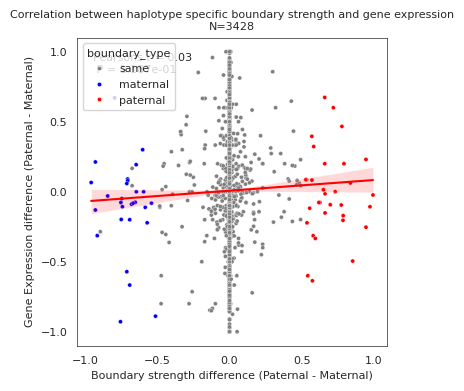

In [269]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
# 假设 Merge_Ins_df 已经加载为 pandas DataFrame

# 确保 diff_inscore 和 Diff 列中没有 NaN 值
filtered_df =  Merge_Ins_df.drop_duplicates(subset=["Gene_ID"], keep="first")
filtered_df = filtered_df.dropna(subset=['diff_inscore', 'Diff'])
P = filtered_df["diff_inscore"].between(-1,1)
filtered_df = filtered_df.loc[P, :]
# haplotype specific boundary 
filtered_df['boundary_type'] = filtered_df['boundary_type'].fillna('Unassigned')
# deduplicate 

# pcc
pcc, p = pearsonr(filtered_df['diff_inscore'], filtered_df['Diff'])
# 绘制散点图和拟合线
plt.figure(figsize=(4, 4))
sns.scatterplot(x='diff_inscore', y='Diff', data=filtered_df,  hue='boundary_type', palette={'paternal':'red', 'maternal':'blue', 'same':'grey', 'Unassigned': 'black' })
sns.regplot(x='diff_inscore', y='Diff', data=filtered_df, scatter=False, color='red')
plt.text(0.05, 0.95, f'Pearsons r = {pcc:.2f}\n P = {p:.3e}', transform=plt.gca().transAxes, fontsize=8, verticalalignment='top')
print( f'Pearsons r = {pcc:.2f}\n P = {p:.3e}')
# 设置图表标题和标签
plt.title(f'Correlation between haplotype specific boundary strength and gene expression\nN={ len(filtered_df) }')
plt.xlabel('Boundary strength difference (Paternal - Maternal)')
plt.ylabel('Gene Expression difference (Paternal - Maternal)')

plt.xticks(ticks=[-1, -0.5, 0, 0.5, 1])
plt.yticks(ticks=[-1, -0.5, 0, 0.5, 1])
plt.tick_params(axis='both', direction='out')

# 显示图形
plt.savefig("Haplotype_specific_boundaries_gene_expression.pdf")
# plt.show()


In [257]:
# Tracks export
track_dir = "/data3/HG001-pore-c/hg001-dip3d-output/contact_hap-pore-c/ipynb/Tracks_file"

exfile = f"{track_dir}/hg001_paternal_insulation.bedgraph"
Merge_Ins_df.loc[:, ["chrom", "start", "end", "p_inscore"] ].to_csv(exfile, header=False, index=False, sep="\t")

exfile = f"{track_dir}/hg001_maternal_insulation.bedgraph"
Merge_Ins_df.loc[:, ["chrom", "start", "end", "m_inscore"] ].to_csv(exfile, header=False, index=False, sep="\t")

exfile = f"{track_dir}/hg001_insulation_diff.bedgraph"
Merge_Ins_df.loc[:, ["chrom", "start", "end", "diff_inscore"] ].to_csv(exfile, header=False, index=False, sep="\t")

exfile = f"{track_dir}/hg001_insulation_Paternal_genes.bedgraph"
Merge_Ins_df.loc[:, ["chrom", "start", "end", "Paternal"] ].to_csv(exfile, header=False, index=False, sep="\t")

exfile = f"{track_dir}/hg001_insulation_Maternal_genes.bedgraph"
Merge_Ins_df.loc[:, ["chrom", "start", "end", "Maternal"] ].to_csv(exfile, header=False, index=False, sep="\t")

exfile = f"{track_dir}/hg001_insulation_genes_diff.bedgraph"
Merge_Ins_df.loc[:, ["chrom", "start", "end", "Diff"] ].to_csv(exfile, header=False, index=False, sep="\t")

P =  Merge_Ins_df["boundary_type"] == "paternal"
exfile = f"{track_dir}/hg001_paternal_boundary.bed"
Merge_Ins_df.loc[P, ["chrom", "start", "end", "boundary_type"] ].to_csv(exfile, header=False, index=False, sep="\t")

P =  Merge_Ins_df["boundary_type"] == "maternal"
exfile = f"{track_dir}/hg001_maternal_boundary.bed"
Merge_Ins_df.loc[P, ["chrom", "start", "end", "boundary_type"] ].to_csv(exfile, header=False, index=False, sep="\t")